In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [12]:
#C40 redshift parameters
one_three = ["a=0.1644", "a=0.1615", "a=0.1593", "a=0.1590", "a=0.1588"]
three_five = ["a=0.1566", "a=0.1544","a=0.1570","a=0.1563","a=0.1545","a=0.1569","a=0.1539"]
five_seven = ["a=0.1515","a=0.1499","a=0.1544","a=0.1518","a=0.1493","a=0.1519","a=0.1494","a=0.1500"]
seven_nine = ["a=0.1476", "a=0.1452","a=0.1476","a=0.1452","a=0.1477","a=0.1588","a=0.1453","a=0.1472"]
nine_one = ["a=0.1430", "a=0.1400","a=0.1429","a=0.1430","a=0.1405","a=0.1409","a=.1435"]

In [202]:
def cdf_tau_quantile(directory, res_files, target_files, valid_start_chars, los, combined_annotation, xy_position, num_samples=100):
    """
    Plots the cdf vs. tau value for a specific redshift range
    
    Parameters:
    directory (string): the source code for where the data files are stored on your computer
    res_files (list): list of strings of the res_file found in the data files labeled by cosmic parameters
    target_files (list): list of strings detailing the cosmic parameters that are to be plotted
    valid_start_chars (list): list of strings of the box sizes that are to be plotted
    los (int): the number of line of sight samples to take
    combined_annotation (string): a description of the redshift values being plotted, or any other information
    xy_position (tuple): the position of the annotation box on the graph
    num_samples (int): the number of random samples to take for computing percentiles
    """

    all_data = []
    for subdir in os.listdir(directory):
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files:
                    for res_file in res_files:
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            print(f"File exists: {file_path}")
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_data.append(df)
    
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)

    all_tau_values = -np.log(combined_df.values.flatten())
    one = np.linspace(0, 1, los+1)
    q25_arr, q75_arr, q50_arr, q5_arr, q95_arr = [0], [0], [0], [0], [0]
    
    tau_samples = []
    for _ in range(num_samples):
        sample = np.random.choice(all_tau_values, los, replace=False)
        sample.sort()
        tau_samples.append(sample)

    for i in range(los):
        tau_1 = [sample[i] for sample in tau_samples]
        
        tau_1 = np.array(tau_1)
        q25 = np.quantile(tau_1, .25)
        q75 = np.quantile(tau_1, .75)
        q50 = np.quantile(tau_1, .5)
        q5 = np.quantile(tau_1, .05)
        q95 = np.quantile(tau_1, .95)
        q50_arr.append(q50)
        q25_arr.append(q25)
        q75_arr.append(q75)
        q5_arr.append(q5)
        q95_arr.append(q95)
    
    plt.plot(q50_arr, one, label='Median, ' + str(los) + ' samples', color='black')
    plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5, label='25% to 75%')
    plt.fill_betweenx(one, q5_arr, q95_arr, color='gray', alpha=0.2, label='5% to 95%')
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.ylabel(r'P(> $\langle \tau_{\mathrm{GP}} \rangle_{50}$)', fontsize=20)
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_position, bbox=bbox_props, ha='center', va='center')
    plt.legend(loc='upper left')

File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1453\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1472\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-0

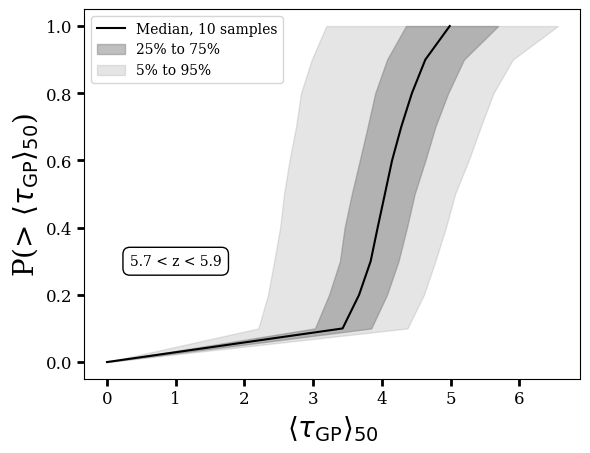

In [138]:
cdf_tau_quantile(r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40',["avgflux.x50.res"],seven_nine,['A','C','F'],10,'5.7 < z < 5.9',(1, .3))

In [12]:
def histogram(directory, res_files, target_files,valid_start_chars,los,cdf,combined_annotation,xy_position,bin_size,scale):
    """"
    Plots a histogram of optical depth data at a specific redshift range and CDF value
    
    Parameters:
    directory (string): the source code for where the data files are stored on your computer
    res_files (list): list of strings of the res_file found in the data files labeled by cosmic parameters
    target_files (list): list of strings detailing the cosmic parameters that are to be plotted
    valid_start_chars (list): list of strings of the box sizes that are to be plotted
    los (float): the value of line of sight sampling that the data will be split into
    cdf (float): the value of cdf that the optical depth will be plotted against
    combined_annotation (string): a description of the redshift values being plotted, or any other information
    xy_position (floats): the position of the annotation box on the graph
    bin_size (int): size of bins for the histogram
    scale (string): decides if the y-axis is scaled linearly or log
    """
    all_dataframes = [] 
    for subdir in os.listdir(directory): #loads in chosen directory
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files: #cycles through a list of box sizes
                    for res_file in res_files: #cycles through a list of res_files
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            print(f"File exists: {file_path}")
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_dataframes.append(df) #appends all the selected resfiles to the same list
                        #else:
                            #print(f"File does not exist: {file_path}")
                            
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    z = combined_df.transpose()
    df= [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)] #splits the data into los sample sizes
    tau_1 = [] 
    one = np.linspace(0,1,los) #initalizes the cumulative distribution function
    for i in df:
        first_row = i.iloc[0] #extracts the first row of 'df'
        tau = -np.log(np.array(first_row)) #calculates 'flux' to 'tau' from the original data
        tau_sort = np.sort(tau)
        index_1 = np.abs(np.array(one) - cdf).argmin() #calculates the difference between 'one' and the chosen cdf value for plotting
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='large')
    plt.rc('ytick', labelsize='large')
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_position, 
             bbox=bbox_props, ha='center', va='center')
    plt.hist(tau_1, bins=bin_size, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
    plt.yscale(scale)
    plt.show()

File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1430\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1400\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1430\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1409\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\F\a=0.1429\avgflux.x50.res


C:\Users\eawer\AppData\Local\Temp\ipykernel_30784\1383977854.py:41: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row)) #calculates 'flux' to 'tau' from the original data


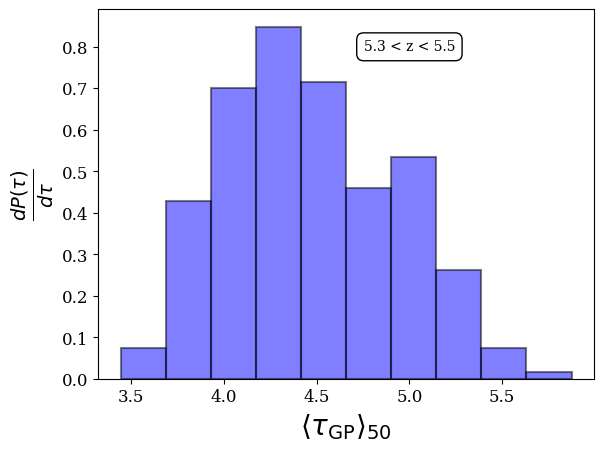

In [15]:
histogram(r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40',["avgflux.x50.res"],nine_one,['A','C','F'],10,.1,r'5.3 < z < 5.5',(5,.8),10,'linear')

In [ ]:
#comparing old and new data (not a function)
directory = r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40'
valid_start_chars = ['F']
res_files = ['avgflux.x50.res','avgflux.x50.resL6']
target_files = ["a=0.1452","a=0.1453"]
los = 40
combined_annotation = 'z=5.89 \n40 los \n F box'
xy_position = (7.5, .7)

all_dataframes_dict = {res_file: [] for res_file in res_files}

for subdir in os.listdir(directory):
    if subdir[0] in valid_start_chars:
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for file_name in target_files:
                for res_file in res_files:
                    file_path = os.path.join(subdir_path, file_name, res_file)
                    if os.path.isfile(file_path):
                        #print(file_path)
                        df = pd.read_csv(file_path, delimiter=' ')
                        #print(df)
                        all_dataframes_dict[res_file].append(df)

colors = ['blue', 'green']
labels = ['Old Data', 'New Data']

for res_file, color, label in zip(res_files, colors, labels):
    combined_df = pd.concat(all_dataframes_dict[res_file], ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    #print(combined_df)
    z = combined_df.transpose()
    df = [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)]
    one = np.linspace(0,1,los) #initalizes the cumulative distribution function
    q25_arr = []
    q75_arr = []
    q50_arr = []
    q5_arr = []
    q95_arr = []
    for i in range(len(one)):
        tau_1 = []
        index_1 = np.abs(np.array(one)-one[i]).argmin()
        #print(index_1)
        for j in df:
            first_row = j.iloc[0]
            tau = -np.log(np.array(first_row))
            tau_sort = np.sort(tau)
            tau_1_value = tau_sort[index_1]
            tau_1.append(tau_1_value)
        tau_1 = np.array(tau_1)
        q25 = np.quantile(tau_1, .25)
        q75 = np.quantile(tau_1, .75)
        q50 = np.quantile(tau_1, .5)
        q5 = np.quantile(tau_1, .05)
        q95 = np.quantile(tau_1, .95)
        q50_arr.append(q50)
        q25_arr.append(q25)
        q75_arr.append(q75)
        q5_arr.append(q5)
        q95_arr.append(q95)
        #print(np.max(tau_1))
    plt.fill_betweenx(one, q25_arr, q75_arr, color=color, alpha=0.5, label=f'25% to 75% {label}')
    plt.fill_betweenx(one, q5_arr, q95_arr, color=color, alpha=0.2, label=f'5% to 95% {label}')
    plt.plot(q50_arr, one, label=f'Median {label}', color=color)

plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.annotate(combined_annotation, xy=xy_position, bbox=bbox_props, ha='center', va='center')
plt.legend(loc='lower right')
plt.show()


In [16]:
def table(directory, res_files, target_files,valid_start_chars,los,cdf):
    """"
    Creates a table for tau values at a specific CDF

    Parameters:
    directory (string): the source code for where the data files are stored on your computer
    res_files (list): list of strings of the res_file found in the data files labeled by cosmic parameters
    target_files (list): list of strings detailing the cosmic parameters that are to be plotted
    valid_start_chars (list): list of strings of the box sizes that are to be plotted
    los (float): the value of line of sight sampling that the data will be split into
    cdf (float): the value of cdf that the corresponding optical depth will display
    """
    all_dataframes = [] 
    for subdir in os.listdir(directory): #loads in chosen directory
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files: #cycles through a list of box sizes
                    for res_file in res_files: #cycles through a list of res_files
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            print(f"File exists: {file_path}")
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_dataframes.append(df) #appends all the selected resfiles to the same list
                        #else:
                            #print(f"File does not exist: {file_path}")
                            
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    z = combined_df.transpose()
    df= [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)] #splits the data into los sample sizes
    one = np.linspace(0,1,los) #initalizes the cumulative distribution function
    for i in range(len(one)):
        tau_1 = []
        index_1 = np.abs(np.array(one) - cdf).argmin() #calculates the difference between 'one' and the chosen cdf value for plotting
        for j in df:
            first_row = j.iloc[0]
            tau = -np.log(np.array(first_row)) #calculates 'flux' to 'tau' from the original data
            tau_sort = np.sort(tau)
            tau_1_value = tau_sort[index_1]
            tau_1.append(tau_1_value)
        tau_1 = pd.DataFrame(tau_1,columns=['tau'])
    return tau_1

In [17]:
table(r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40',["avgflux.x50.res"],one_three,['A','C','F'],10,.5)

File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1644\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1615\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1593\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1590\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\F\a=0.1588\avgflux.x50.res


,tau
0,1.654958
1,1.691733
2,1.715910
3,1.670250
4,1.697177
...,...
495,2.465104
496,2.676697
497,2.662265
498,2.510471


In [59]:
def obs(file, redshift,combined_annotation,xy_pos,xlim):
    """
    Reads in and plots data from the Boseman et al. 2018 paper in a CDF vs tau graph specifically in comparison to the simulation data.
    
    Parameters:
    file (string): The name of the data file in csv format.
    redshift (list of tuples): List of tuples specifying redshift minimum and maximum, can plot multiple lines, ex: [(5.1, 5.3)].
    combined_annotation (string): A string that describes the redshift range being plotted
    xy_pos (float): The position of the annotation on the plot
    xlim (integer): The higher limit of the x-axis of the plot
    """
    df = pd.read_csv(file)
    df['Tau'] = df['Tau'].astype(str).fillna('') 
    df['<Z>'] = pd.to_numeric(df['<Z>'], errors='coerce')
    df = df[~df['Tau'].str.contains('nan')]  
    df = df.sort_values(by='<Z>')  # Sorting by redshift first to split the data into redshift ranges
    df = df.drop(['QUASAR', 'QUASAR Z'], axis=1)
    df1 = df.copy()
    df['Tau'] = df['Tau'].str.replace('> ', '') 
    df['Tau'] = pd.to_numeric(df['Tau'], errors='coerce')
    
    obs_list_3858= [] #one that's normal
    for z_min, z_max in redshift:
        obs_df = df[(df['<Z>'] >= z_min) & (df['<Z>'] <= z_max)]
        obs_df = obs_df.sort_values(by='Tau')
        obs_df_3858 = obs_df
        obs_list_3858.append(obs_df_3858)
    obs_list_new = [] #the one that replaces
   
    for z_min, z_max in redshift: #the one that replaces
        obs_df1 = df1[(df1['<Z>'] >= z_min) & (df1['<Z>'] <= z_max)]
        tau_values = obs_df1[obs_df1['Tau'].str.contains('> ', na=False)]
        tau_list = tau_values.index.tolist()
        for index in tau_list:
            obs_df1.at[index, 'Tau'] = '1000'
        obs_list_new.append(obs_df1)
        print(len(obs_df1))
    prob_list_3858 = []
    for obs_df_3858 in obs_list_3858:
        
        obs_df_3858['Tau'] = pd.to_numeric(obs_df_3858['Tau'], errors='coerce')
        initial_row = pd.DataFrame({'Tau': [0]})
        end_row = pd.DataFrame({'Tau':[100]})
        bins_arr = pd.concat([initial_row,obs_df_3858,end_row],ignore_index=True)
        hist, bins = np.histogram(obs_df_3858['Tau'], bins=bins_arr['Tau'])
        cumulative_counts = np.cumsum(hist)
        prob = cumulative_counts / len(obs_df_3858)
        prob_df_3858 = pd.DataFrame({
            'tau': bins[:-1],
            'probability': prob
        })
        initial_row = pd.DataFrame({'tau': [0],'probability': [0] })
        prob_df_3858 = pd.concat([initial_row,prob_df_3858],ignore_index=True)
        prob_list_3858.append(prob_df_3858)
    
    prob_list_new = []
    for obs_df_new in obs_list_new:
        obs_df_new['Tau'] = pd.to_numeric(obs_df_new['Tau'], errors='coerce')
        hist, bins_new = np.histogram(obs_df_new['Tau'], bins=bins)
        cumulative_counts = np.cumsum(hist)
        prob = cumulative_counts / len(obs_df_new['Tau'])
        prob_df_new = pd.DataFrame({
            'tau': bins_new[:-1],
            'probability': prob
        })
        initial_row = pd.DataFrame({'tau': [0],'probability': [0] })
        prob_df_new = pd.concat([initial_row,prob_df_new],ignore_index=True)
        prob_list_new.append(prob_df_new) 
        
    # Plotting
    plt.figure(figsize=(10, 5))
    
    for prob_df_3858 in prob_list_3858:
        plt.plot(prob_df_3858['tau'], prob_df_3858['probability'], linestyle='--', color='blue', label='Boseman et al. 2018')

    for prob_df_new in prob_list_new:
        plt.plot(prob_df_new['tau'], prob_df_new['probability'], linestyle='--',color='blue')

        plt.fill_between(prob_df_3858['tau'], prob_df_3858['probability'], prob_df_new['probability'], color='gray', alpha=0.3)
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    cdf_tau_quantile(r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40',["avgflux.x50.res"],seven_nine,['A','C','F'],33,combined_annotation,(50,1))
    plt.annotate(combined_annotation, xy=xy_pos,  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
    plt.xlim([0, xlim])  # Adjust as needed
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.ylabel(r'P(> $\langle \tau_{\mathrm{GP}} \rangle_{50}$)', fontsize=20)
    plt.legend()
    plt.show()
#I need to go through all the values above 3.613 to 10 tau, and find those probabilities, and plot them as a band using fill between, with the shaded region contained by two horizontal lines that naturally fl

33
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1453\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1472\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1476\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1452\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952

C:\Users\eawer\AppData\Local\Temp\ipykernel_3920\4166218056.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df_new['Tau'] = pd.to_numeric(obs_df_new['Tau'], errors='coerce')


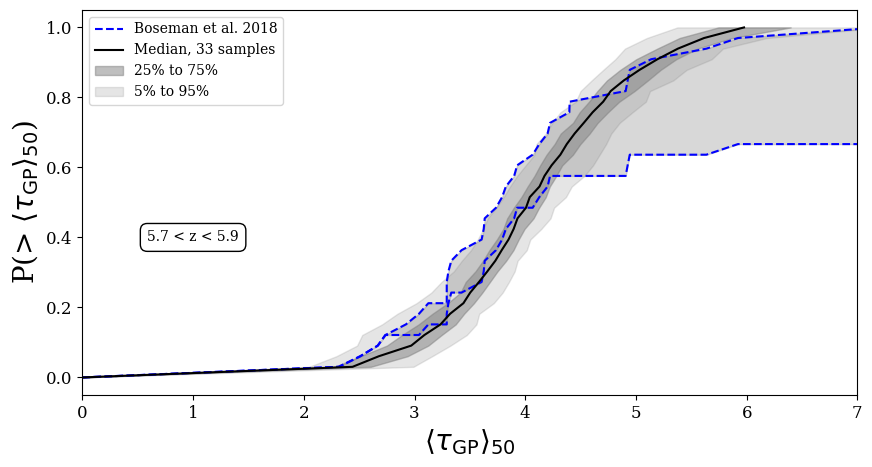

In [60]:
obs('alldata_silver.csv',[(5.7,5.9)],'5.7 < z < 5.9',(1,.4),7)
#annotate los plot median first, boseman dashed line

In [203]:
def obs_twenty_two(file_path,err_file,redshift,combined_annotation,xy_pos,xlim):
    """
    Reads in and plots data from the Boseman et al. 2022 paper in a CDF vs tau graph specifically in comparison to the CROC simulation data.
    
    Parameters:
    file (string): The name of the data file in csv format.
    redshift (list of tuples): List of tuples specifying redshift minimum and maximum, can plot multiple lines, ex: [(5.1, 5.3)].
    combined_annotation (string): A string that describes the redshift range being plotted
    xy_pos (float): The position of the annotation on the plot
    xlim (integer): The higher limit of the x-axis of the plot
    """
    column_names = ['z_bin', 'usable_pixel_fraction', 'mean_z_at_usable', 
                'mean_flux', '+1_sigma_err', '-1_sigma_err', 'z_qso']
    df = pd.read_csv(file_path,header=None,delim_whitespace=True,names=column_names)
    err = pd.read_csv(err_file,header=None,delim_whitespace=True,names=column_names)
    df= df.dropna()
    err = err.dropna()
    err1 = err.copy()
    err['mean_flux'] = np.exp(-100)
    err1['mean_flux'] = err['+1_sigma_err']
    
    df=df.sort_values(by='mean_z_at_usable') #sorting values of redshift numerically
    obs_list = []
    for z_min, z_max in redshift: #for lower bound, 0
        obs_df = df[(df['mean_z_at_usable'] >= z_min) & (df['mean_z_at_usable'] <= z_max)]
        obs_df['mean_flux'] = -np.log(obs_df['mean_flux'])
        err = err[(err['mean_z_at_usable'] >= z_min) & (err['mean_z_at_usable'] <= z_max)]
        err['mean_flux'] = -np.log(err['mean_flux'])
        result = pd.concat([obs_df,err],ignore_index=True)
        result = result.sort_values(by='mean_flux')
        obs_list.append(result)
    obs_list_new = []
    for z_min, z_max in redshift:
        obs_df_new = df[(df['mean_z_at_usable'] >= z_min) & (df['mean_z_at_usable'] <= z_max)]
        obs_df_new['mean_flux'] = -np.log(obs_df_new['mean_flux'])
        obs_df_new = obs_df_new.sort_values(by='mean_flux')
        err1 = err1[(err1['mean_z_at_usable'] >= z_min) & (err1['mean_z_at_usable'] <= z_max)]
        err1['mean_flux'] = -np.log(err1['mean_flux'])
        result1 = pd.concat([obs_df_new,err1])
        result1 = result1.sort_values(by='mean_flux')
        obs_list_new.append(result1)

    prob_list = []
    for result in obs_list: #remove iteration
        result['mean_flux'] = pd.to_numeric(result['mean_flux'], errors='coerce')
        initial_row = pd.DataFrame({'mean_flux': [0]})
        end_row = pd.DataFrame({'mean_flux':[100]})
        bins_arr = pd.concat([initial_row,result1,end_row],ignore_index=True)
        hist, bins = np.histogram(result['mean_flux'], bins=bins_arr['mean_flux'])
        cumulative_counts = np.cumsum(hist)
        prob = cumulative_counts / len(result['mean_flux'])
        prob_df = pd.DataFrame({
            'tau': (bins[1:]+bins[:-1])/2,
            'probability': prob
        })
        prob_list.append(prob_df)
    prob_list_new = []
    for result1 in obs_list_new:
        result1['mean_flux'] = pd.to_numeric(result1['mean_flux'], errors='coerce')
        hist, bins_new = np.histogram(result1['mean_flux'], bins=bins_arr['mean_flux'])
        cumulative_counts = np.cumsum(hist)
        prob_new = cumulative_counts / len(result1['mean_flux'])
        prob_df_new = pd.DataFrame({
            'tau': (bins_new[1:]+bins_new[:-1])/2,
            'probability': prob_new
        })
        prob_list_new.append(prob_df_new)
    for j, prob_df_new in enumerate(prob_list_new):
        z_min,z_max = redshift[j]
        plt.plot(prob_df_new['tau'],prob_df_new['probability'],color = 'blue',linestyle = 'dotted')
    for i, prob_df in enumerate(prob_list):
        z_min, z_max = redshift[i]
        plt.plot(prob_df['tau'], prob_df['probability'], label='Bosman et al. 2022',color = 'blue',linestyle = 'dotted')
        plt.fill_between(prob_df['tau'], prob_df['probability'], prob_df_new['probability'], color='blue', hatch='///', alpha=0.3)
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_pos, 
            bbox=bbox_props, ha='center', va='center')
    cdf_tau_quantile(r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40',["avgflux.x50.res"],nine_one,['A','C','F'],len(result),combined_annotation,xy_pos) #this line calls the function that plots a cdf of the simulation data, line can be removed for just Boseman data
    plt.xlim([0, xlim])
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.ylabel(r'P(> $\langle \tau_{\mathrm{GP}} \rangle_{50}$)', fontsize=20)
    plt.legend()
    plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3920\189318247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['mean_flux'] = -np.log(obs_df['mean_flux'])
C:\Users\eawer\AppData\Local\Temp\ipykernel_3920\189318247.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df_new['mean_flux'] = -np.log(obs_df_new['mean_flux'])
C:\Users\eawer\AppData\Local\Temp\ipykernel_3920\519314322.py:33: RuntimeWarning: divide by zero encountered in log
  all_tau_values = -np.log(combined_df.values.flatten())


File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1430\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1400\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1430\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1409\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1429\avgflux.x50.res


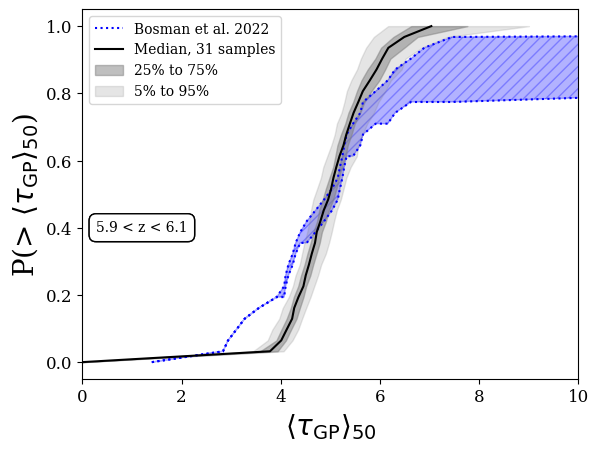

In [204]:
obs_twenty_two(r'C:\Users\eawer\Downloads\stac1046_supplemental_file\all-lya-50cmpc.dat',r'C:\Users\eawer\Downloads\stac1046_supplemental_file\all-lya-limits-50cmpc.dat',[(5.9,6.1)],'5.9 < z < 6.1',(1.2,.4),10)